In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import requests
from scipy.stats import linregress

In [135]:
Tickers= ["AAPL", "BAC", "VZ", "WMT", "XOM", "AMZN",]
stock = requests.get(f"https://api.iextrading.com/1.0/stock/{Tickers[0]}/chart/1m")
stocks = stock.json()
dates = []

for i in range(3,len(stocks)):
    dates.append(stocks[i]["date"])


In [2]:
#stock prices
apple_stocks = "Stock Prices/AAPL.csv"
amazon_stocks = "Stock Prices/AMZN.csv"
bankoa_stocks = "Stock Prices/BAC.csv"
verizon_stocks = "Stock Prices/VZ.csv"
#walmart_stocks = "Stock Prices/WMT.csv"
exxon_stocks = "Stock Prices/XOM.csv"

#sentiments
apple_sentiments = "Sentiments/apple_sentiments_final.csv"
amazon_sentiments = "Sentiments/Amazon_sentiments_final.csv"
bankoa_sentiments = "Sentiments/BofA__sentiments_final.csv"
verizon_sentiments = "Sentiments/verizon_final.csv"
#walmart_sentiments = "Sentiments/walmart_sentiments_final.csv"
exxon_sentiments = "Sentiments/exxon_final.csv"

In [143]:
#Prep Apple data
apple_sentiments_df = pd.read_csv(apple_sentiments)
apple_num_articles = apple_sentiments_df.groupby('Date').count()['Sentiment']
apple_max_sent = apple_sentiments_df.groupby('Date')['Sentiment'].max()
apple_min_sent = apple_sentiments_df.groupby('Date')['Sentiment'].min()
apple_avg_sent = apple_sentiments_df.groupby('Date')['Sentiment'].mean()
apple_sum_sent = apple_sentiments_df.groupby('Date')['Sentiment'].sum()

#Add columns to stocks data
apple_stocks_df = pd.read_csv(apple_stocks).set_index('Date')
apple_stocks_df['#articles'] = [x for x in apple_num_articles]
apple_stocks_df['max sentiment'] = [x for x in apple_max_sent]
apple_stocks_df['min sentiment'] = [x for x in apple_min_sent]
apple_stocks_df['avg sentiment'] = [x for x in apple_avg_sent]
apple_stocks_df['sum sentiment'] = [x for x in apple_sum_sent]

apple_stocks_df['Company'] = "Apple"
apple_stocks_df = apple_stocks_df.drop(['Unnamed: 0'],axis=1)
apple_stocks_df.head()


#Statistical analysis
(slope, intercept,rvalue,pvalue, stderr)=linregress(apple_avg_sent, apple_stocks_df['Percent Change'])
# fit = slope * apple_stocks_df['Percent Change'] + intercept
reg_df= pd.DataFrame({"Slope": [slope], "Intercept": [intercept], "Rvalue": [rvalue], "Pvalue": [pvalue], "StdErr": [stderr]})
reg_df



,Slope,Intercept,Rvalue,Pvalue,StdErr
0,0.397036,-0.869448,0.519067,0.019015,0.154099


In [141]:
#Prep Amazon data
amazon_sentiments_df = pd.read_csv(amazon_sentiments)
amazon_num_articles = amazon_sentiments_df.groupby('Date').count()['Sentiment']
amazon_max_sent = amazon_sentiments_df.groupby('Date')['Sentiment'].max()
amazon_min_sent = amazon_sentiments_df.groupby('Date')['Sentiment'].min()
amazon_avg_sent = amazon_sentiments_df.groupby('Date')['Sentiment'].mean()
amazon_sum_sent = amazon_sentiments_df.groupby('Date')['Sentiment'].sum()

#Add columns to stocks data
amazon_stocks_df = pd.read_csv(amazon_stocks).set_index('Date')
amazon_stocks_df['#articles'] = [x for x in amazon_num_articles]
amazon_stocks_df['max sentiment'] = [x for x in amazon_max_sent]
amazon_stocks_df['min sentiment'] = [x for x in amazon_min_sent]
amazon_stocks_df['avg sentiment'] = [x for x in amazon_avg_sent]
amazon_stocks_df['sum sentiment'] = [x for x in amazon_sum_sent]
amazon_stocks_df['Company'] = "Amazon"
                                     
amazon_stocks_df = amazon_stocks_df.drop(['Unnamed: 0'],axis=1)
amazon_stocks_df.head()

#Statistical analysis
(slope, intercept,rvalue,pvalue, stderr)=linregress(amazon_avg_sent, amazon_stocks_df['Percent Change'])
# fit = slope * apple_stocks_df['Percent Change'] + intercept
reg_df= pd.DataFrame({"Slope": [slope], "Intercept": [intercept], "Rvalue": [rvalue], "Pvalue": [pvalue], "StdErr": [stderr]})
reg_df

,Slope,Intercept,Rvalue,Pvalue,StdErr
0,-0.010114,0.714425,-0.005145,0.982826,0.463349


In [142]:
#Prep Bank of America data
bankoa_sentiments_df = pd.read_csv(bankoa_sentiments)
bankoa_num_articles = bankoa_sentiments_df.groupby('Date').count()['Sentiment']
bankoa_max_sent = bankoa_sentiments_df.groupby('Date')['Sentiment'].max()
bankoa_min_sent = bankoa_sentiments_df.groupby('Date')['Sentiment'].min()
bankoa_avg_sent = bankoa_sentiments_df.groupby('Date')['Sentiment'].mean()
bankoa_sum_sent = bankoa_sentiments_df.groupby('Date')['Sentiment'].sum()

#Add columns to stocks data
bankoa_stocks_df = pd.read_csv(bankoa_stocks).set_index('Date')
bankoa_stocks_df['#articles'] = [x for x in bankoa_num_articles]
bankoa_stocks_df['max sentiment'] = [x for x in bankoa_max_sent]
bankoa_stocks_df['min sentiment'] = [x for x in bankoa_min_sent]
bankoa_stocks_df['avg sentiment'] = [x for x in bankoa_avg_sent]
bankoa_stocks_df['sum sentiment'] = [x for x in bankoa_sum_sent]
bankoa_stocks_df['Company'] = "Bank of America"
                            
bankoa_stocks_df = bankoa_stocks_df.drop(['Unnamed: 0'],axis=1)
bankoa_stocks_df.head()

#Statistical analysis
(slope, intercept,rvalue,pvalue, stderr)=linregress(bankoa_avg_sent, bankoa_stocks_df['Percent Change'])
# fit = slope * apple_stocks_df['Percent Change'] + intercept
reg_df= pd.DataFrame({"Slope": [slope], "Intercept": [intercept], "Rvalue": [rvalue], "Pvalue": [pvalue], "StdErr": [stderr]})
reg_df

,Slope,Intercept,Rvalue,Pvalue,StdErr
0,-0.086025,1.175849,-0.050701,0.83189,0.399402


In [147]:
#Prep Verizon data
verizon_sentiments_df = pd.read_csv(verizon_sentiments)
verizon_num_articles = verizon_sentiments_df.groupby('Date').count()['Sentiment']
verizon_max_sent = verizon_sentiments_df.groupby('Date')['Sentiment'].max()
verizon_min_sent = verizon_sentiments_df.groupby('Date')['Sentiment'].min()
verizon_avg_sent = verizon_sentiments_df.groupby('Date')['Sentiment'].mean()
verizon_sum_sent = verizon_sentiments_df.groupby('Date')['Sentiment'].sum()

#Add columns to stocks data
verizon_stocks_df = pd.read_csv(verizon_stocks).set_index('Date')
verizon_stocks_df['#articles'] = [x for x in verizon_num_articles]
verizon_stocks_df['max sentiment'] = [x for x in verizon_max_sent]
verizon_stocks_df['min sentiment'] = [x for x in verizon_min_sent]
verizon_stocks_df['avg sentiment'] = [x for x in verizon_avg_sent]
verizon_stocks_df['sum sentiment'] = [x for x in verizon_sum_sent]
verizon_stocks_df['Company'] = "Verizon"
                            
verizon_stocks_df = verizon_stocks_df.drop(['Unnamed: 0'],axis=1)
verizon_stocks_df.head()

#Statistical analysis
(slope, intercept,rvalue,pvalue, stderr)=linregress(verizon_avg_sent, verizon_stocks_df['Percent Change'])
# fit = slope * apple_stocks_df['Percent Change'] + intercept
reg_df= pd.DataFrame({"Slope": [slope], "Intercept": [intercept], "Rvalue": [rvalue], "Pvalue": [pvalue], "StdErr": [stderr]})
reg_df

,Slope,Intercept,Rvalue,Pvalue,StdErr
0,-0.217728,1.573489,-0.459882,0.041334,0.099091


In [148]:
#Prep Exxon data
exxon_sentiments_df = pd.read_csv(exxon_sentiments)
exxon_num_articles = exxon_sentiments_df.groupby('Date').count()['Sentiment']
exxon_max_sent = exxon_sentiments_df.groupby('Date')['Sentiment'].max()
exxon_min_sent = exxon_sentiments_df.groupby('Date')['Sentiment'].min()
exxon_avg_sent = exxon_sentiments_df.groupby('Date')['Sentiment'].mean()
exxon_sum_sent = exxon_sentiments_df.groupby('Date')['Sentiment'].sum()

#Add columns to stocks data
exxon_stocks_df = pd.read_csv(exxon_stocks).set_index('Date')
exxon_stocks_df['#articles'] = [x for x in exxon_num_articles]
exxon_stocks_df['max sentiment'] = [x for x in exxon_max_sent]
exxon_stocks_df['min sentiment'] = [x for x in exxon_min_sent]
exxon_stocks_df['avg sentiment'] = [x for x in exxon_avg_sent]
exxon_stocks_df['sum sentiment'] = [x for x in exxon_sum_sent]
exxon_stocks_df['Company'] = "Verizon"
                            
exxon_stocks_df = exxon_stocks_df.drop(['Unnamed: 0'],axis=1)
exxon_stocks_df.head()

#Statistical analysis
(slope, intercept,rvalue,pvalue, stderr)=linregress(exxon_avg_sent, exxon_stocks_df['Percent Change'])
# fit = slope * apple_stocks_df['Percent Change'] + intercept
reg_df= pd.DataFrame({"Slope": [slope], "Intercept": [intercept], "Rvalue": [rvalue], "Pvalue": [pvalue], "StdErr": [stderr]})
reg_df
stats.pearsonr(exxon_avg_sent, exxon_stocks_df['Percent Change'])

(-0.07507777392438764, 0.7530783065721951)

In [116]:
#Average sentiment per company
x1 = apple_avg_sent
x2 = amazon_avg_sent
x3 = bankoa_avg_sent
x4 = verizon_avg_sent
x5 = exxon_avg_sent

#Change in price per company
y1 = apple_stocks_df['Percent Change']
y2 = amazon_stocks_df['Percent Change']
y3 = bankoa_stocks_df['Percent Change']
y4 = verizon_stocks_df['Percent Change']
y5 = exxon_stocks_df['Percent Change']

#Number of articles
z1 = 2 * apple_num_articles
z2 = 2 * amazon_num_articles
z3 = 2 * bankoa_num_articles
z4 = 2 * verizon_num_articles
z5 = 2 * exxon_num_articles

#Sum of sentiment, compare to Z
w1 = apple_sum_sent
w2 = amazon_sum_sent
w3 = bankoa_sum_sent
w4 = verizon_sum_sent
w5 = exxon_sum_sent


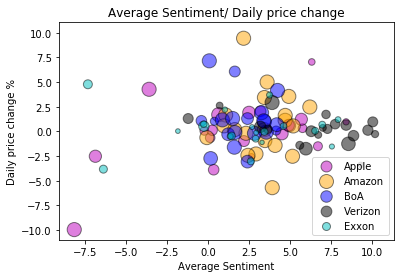

In [119]:
plt.scatter(x1,y1,s=z1, color="m", alpha= .5, edgecolors = "black", label ="Apple")
plt.scatter(x2,y2,s=z2, color="orange", alpha= .5, edgecolors = "black", label ="Amazon")
plt.scatter(x3,y3,s=z3, color="b", alpha= .5, edgecolors = "black", label ="BoA")
plt.scatter(x4,y4,s=z4, color="black", alpha= .5, edgecolors = "black", label ="Verizon")
plt.scatter(x5,y5,s=z5, color="c", alpha= .5, edgecolors = "black", label ="Exxon")
plt.title("Average Sentiment/ Daily price change")
plt.xlabel('Average Sentiment')
plt.ylabel('Daily price change %')


plt.legend(loc=4)
plt.show()
#Are average sentiment and price change correlated 


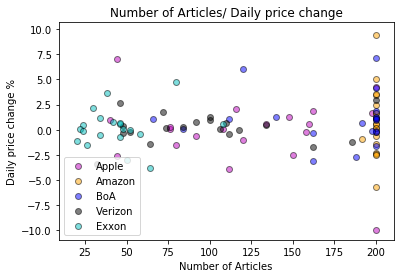

In [133]:
plt.scatter(z1,y1, color="m", alpha= .5, edgecolors = "black", label ="Apple")
plt.scatter(z2,y2, color="orange", alpha= .5, edgecolors = "black", label ="Amazon")
plt.scatter(z3,y3, color="b", alpha= .5, edgecolors = "black", label ="BoA")
plt.scatter(z4,y4, color="black", alpha= .5, edgecolors = "black", label ="Verizon")
plt.scatter(z5,y5, color="c", alpha= .5, edgecolors = "black", label ="Exxon")
plt.title("Number of Articles/ Daily price change")
plt.xlabel('Number of Articles')
plt.ylabel('Daily price change %')


plt.legend(loc=3)
plt.show()

100